In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
x = iris.data

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss = []     
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

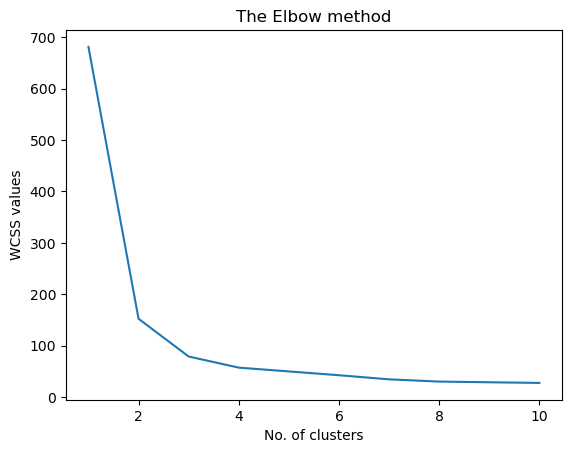

In [8]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS values')
plt.show()

### PCA

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-1])

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

df_pca.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [56]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df_pca)
y_predicted

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [57]:
df_pca.loc[:, 'y_km'] = y_predicted
df_pca.head()

,PC1,PC2,y_km
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1


In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(df_pca.iloc[:, :-1], df_pca['y_km'])
silhouette_avg

0.597676421954799

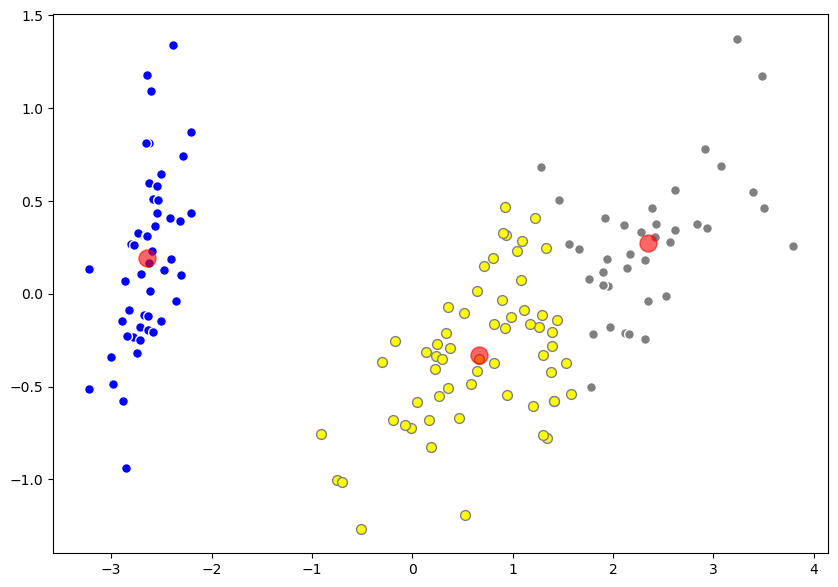

In [58]:
plt.figure(figsize=(10,7))

plt.scatter(df_pca.loc[df_pca['y_km'] == 0, 'PC1'], df_pca.loc[df_pca['y_km'] == 0, 'PC2'], s=50, c='grey', edgecolors="white")
plt.scatter(df_pca.loc[df_pca['y_km'] == 1, 'PC1'], df_pca.loc[df_pca['y_km'] == 1, 'PC2'], s=50, c='blue', edgecolors="white")
plt.scatter(df_pca.loc[df_pca['y_km'] == 2, 'PC1'], df_pca.loc[df_pca['y_km'] == 2, 'PC2'], s=50, c='yellow', edgecolors="grey")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=150, c='red', label='Centroids', alpha=.60)

plt.show()